# 📌 KNN (K-Nearest Neighbors) – Short Form
- Type: Supervised ML algorithm (classification & regression)
- Idea: Predict based on closest data points (neighbors)
#### Working:
1. Choose K (number of neighbors).
2. Measure distance (Euclidean, Manhattan, etc.).
3. Take majority vote (for classification) or average (for regression).
##### Advantages: 
- Simple, no training, good for small data.
#### Disadvantages:
-  Slow for big data, sensitive to noise & irrelevant features.
⚡ Shortcut:
👉 “KNN = Let your neighbors decide for you.” 😅



In [35]:
# import libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [36]:
# load the daata set 
df= sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [38]:
# split the data into x and y 
x = df.drop('species',axis=1)
y= df['species']

In [39]:
# load and fit the KNN classifier on the data
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x, y )

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [40]:
# predict the species for new_measurments 
new_measurment= np.array([[5.1,3.5, 1.4, 0.2]])
knn.predict(new_measurment)

c:\Users\aqso\anaconda3\envs\python_ml\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



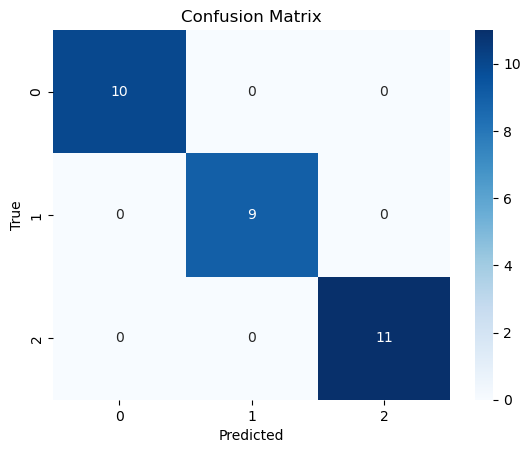

In [41]:
# train test split the data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test, y_train, y_test= train_test_split(x,y , test_size=0.2,random_state=42)
knn.fit(x_train, y_train)
# predict the species for the test data
y_pred=knn.predict(x_test)
# Evaluate the model
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# plot the confusion_matrixt
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues')

plt.xlabel("Predicted")   # ✅ correct
plt.ylabel("True")        # ✅ correct
plt.title("Confusion Matrix")
plt.show()

# Regression usnig KNN 

In [42]:
# apply on tips data set 
# load data set 
tips= sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [43]:
# split the data into x and y
x= tips.drop('tip',axis=1)
y= tips['tip']

In [44]:
# encode the catgorical column unisng for loop and label
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for col in x.columns:
    if x[col].dtype== 'object'or x[col].dtype=='category':
        x[col]= le.fit_transform(x[col])

In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# create model
model = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)

# fit
model.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)

# evaluate
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.3294034029001649
MSE: 0.8382265306122448


In [47]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# model
model = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)

# fit
model.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)

# evaluate
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.3294034029001649
MSE: 0.8382265306122448
RMSE: 0.9155471209130881


In [49]:
x_test.head()

,total_bill,sex,smoker,day,time,size
24,19.82,1,0,1,0,2
6,8.77,1,0,2,0,2
153,24.55,1,0,2,0,4
211,25.89,1,1,1,0,4
198,13.00,0,1,3,1,2


In [51]:
# predict the specific value 
model.predict([[19.82,1,0,1, 0, 3]])

c:\Users\aqso\anaconda3\envs\python_ml\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([2.632])